In [30]:
import pytesseract
from pytesseract import Output
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def grayscale_plot(filepath):
    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    #print("1:::",WIDTH,HEIGHT,":::1")
    pix = img.load()
    #print("1:::",pix,":::1")
    data = np.asarray(img.getdata())
    #print("1:::",data,":::1")
    data = data.reshape((HEIGHT,WIDTH))
    #print("1:::",data,":::1")
    fig,ax = plt.subplots()
    reduced_data = data.mean(axis=0)
    #print("1:::",reduced_data,":::1")
    ax.plot(reduced_data)
    plt.show()
    plt.imshow(img)
    return reduced_data,WIDTH,HEIGHT

def c_sep_size1(reduced_data,WIDTH):
    p=[]
    c_sep=[]
    c_sep1=[]
    c_sep_size=[]
    for i in range(11,len(reduced_data)-10):
        if(reduced_data[i-3]==255. and reduced_data[i+3]==255.):
            p.append(i)
    for a in range(len(p)-1):
        if(p[a+1]-p[a]>30):
            c_sep.append(p[a])
    #if(len(p)>0):
    c_sep.append(p[-1])

    for i in range(0,len(c_sep)-1):
        if(c_sep[i+1]-c_sep[i]!=1):
            c_sep1.append(c_sep[i])
    #if(len(c_sep)>0):
    c_sep1.append(c_sep[-1])
    c_sep1.append(WIDTH)
    c_sep_size.append(c_sep1[0])
    for i in range(len(c_sep1)-1):
        c_sep_size.append(c_sep1[i+1]-c_sep1[i])
    #c_sep_size.append(c_sep[-1]-c_sep1[-1])
    return c_sep,c_sep1,c_sep_size

In [81]:
filepath='New folder/a1.jpg'
img = cv2.imread(filepath)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
bbox_list =[]
bboxtxt_list=[]
vall=[]
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #bbox = (x, y, w, h)
        #bbox_list.append(bbox)
        #bboxtxt_list.append(d['text'][i])
        #print(d['text'][i])
        vall.append([x,d['text'][i]])
print(vall)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[216, 'Patients'], [270, 'with'], [328, 'Patients'], [380, 'with'], [215, 'Spontaneous'], [336, 'Secondary'], [440, 'Control'], [218, 'Thrombo:'], [330, 'Thrombosis'], [437, 'Subjects'], [0, 'Characteristic'], [230, '(N=153]'], [342, '(N=14]'], [437, '(N=150)']]


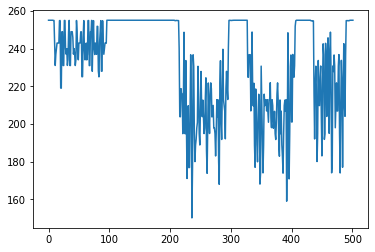

([204, 324, 428], [204, 324, 428, 502], [204, 120, 104, 74])

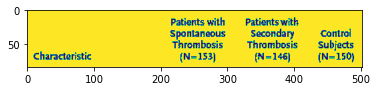

In [82]:

rd,w,h=grayscale_plot(filepath)
c_sep,c_sep1,c_sep_size =c_sep_size1(rd,w)
c_sep,c_sep1,c_sep_size

In [85]:
final_op={}
q=0
m=[]
x=0
for j in range(len(c_sep1)):
    for i in vall:
        if(i[0]<c_sep1[j] and i[0]>=x):
            
            m.append(i[1])
    x=c_sep1[j]
    if(len(m)!=0):
        final_op[q]=m
        m=[]
        q+=1

final_op

{0: ['Characteristic'],
 1: ['Patients', 'with', 'Spontaneous', 'Thrombo:', '(N=153]'],
 2: ['Patients', 'with', 'Secondary', 'Thrombosis', '(N=14]'],
 3: ['Control', 'Subjects', '(N=150)']}

In [59]:
len(final_op)

2